## CW Delta[HHB2] Fitting

In [1]:
import pandas as pd
import glob
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read Simulation data

In [3]:

csv_folder = '/content/drive/MyDrive/MCX_data/CW_results'
GT_folder = '/content/drive/MyDrive/MCX_data/csv'

In [4]:
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))
df_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [5]:
df_all.head()

,ID,20_784,20_800,20_818,20_835,20_851,20_868,20_881,20_894,25_784,...,30_881,30_894,35_784,35_800,35_818,35_835,35_851,35_868,35_881,35_894
0,1,66385.83,67754.170,68516.484,69343.470,69514.664,70078.760,70730.19,71795.580,19970.965,...,6846.7305,6889.562,2290.6636,2398.9750,2432.2776,2486.6145,2434.6934,2429.3196,2383.8310,2320.5745
1,2,70293.18,71699.830,72514.610,73381.010,73629.234,74246.310,74937.61,76108.840,22145.627,...,8009.5625,8068.446,2843.9932,2935.9368,3003.1157,3082.5007,3015.3208,3002.5537,2959.1638,2902.5244
2,3,72967.77,74388.445,75256.280,76124.320,76423.640,77083.734,77785.61,79015.070,23798.281,...,8965.1650,9037.942,3347.8254,3426.8560,3513.3704,3610.5857,3529.1533,3504.7769,3468.7659,3423.8990
3,4,74789.85,76211.440,77096.280,77962.164,78288.170,78973.410,79691.00,80952.250,25007.436,...,9704.5100,9785.313,3773.1782,3852.4807,3943.0500,4048.5056,3954.5144,3930.2812,3892.0156,3857.8848
4,5,76013.35,77465.766,78348.610,79210.720,79539.670,80225.460,80971.63,82226.086,25883.992,...,10260.9790,10344.441,4108.5396,4202.6530,4281.2120,4391.5635,4282.5390,4268.7144,4230.3813,4206.0290


In [6]:
csv_files = glob.glob(os.path.join(GT_folder, '*.csv'))
GT_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [7]:
GT_all.head

<bound method NDFrame.head of           ID  HBO1  HHB1  HBO2  HHB2  Thickness  complete
0      43925  12.5   7.5    40    25         18     False
1      43926  12.5   7.5    40    25         20     False
2      43927  12.5   7.5    40    27         10     False
3      43928  12.5   7.5    40    27         12     False
4      43929  12.5   7.5    40    27         14     False
...      ...   ...   ...   ...   ...        ...       ...
87841  10977   6.5   6.5    28    21         14     False
87842  10978   6.5   6.5    28    21         16     False
87843  10979   6.5   6.5    28    21         18     False
87844  10980   6.5   6.5    28    21         20     False
87845  10981   6.5   6.5    28    23         10     False

[87846 rows x 7 columns]>

### Merge data

In [8]:
GT_all['ID'] = GT_all['ID'].astype(int)
df_all['ID'] = df_all['ID'].astype(int)
GT_all = GT_all.sort_values('ID').reset_index(drop=True)
df_all = df_all.sort_values('ID').reset_index(drop=True)

In [9]:
merged_df = pd.merge(df_all, GT_all, on='ID', how='inner')

In [10]:
merged_df.head

<bound method NDFrame.head of       ID     20_784     20_800     20_818     20_835     20_851     20_868  \
0      1  66385.830  67754.170  68516.484  69343.470  69514.664  70078.760   
1      2  70293.180  71699.830  72514.610  73381.010  73629.234  74246.310   
2      3  72967.770  74388.445  75256.280  76124.320  76423.640  77083.734   
3      4  74789.850  76211.440  77096.280  77962.164  78288.170  78973.410   
4      5  76013.350  77465.766  78348.610  79210.720  79539.670  80225.460   
..   ...        ...        ...        ...        ...        ...        ...   
105  106  73929.250  75414.060  76355.430  77267.360  77618.240  78322.570   
106  107  75430.086  76924.530  77843.220  78740.630  79092.100  79790.750   
107  108  76453.340  77946.420  78854.914  79738.800  80071.490  80764.900   
108  109  63273.727  64918.380  65873.080  66822.670  67046.290  67648.110   
109  110  68182.760  69780.030  70720.980  71687.820  71969.620  72615.766   

        20_881     20_894     25_784  ...     35_851     35_868     35_881  \
0    70730.190  71795.580  19970.965  ...  2434.6934  2429.3196  2383.8310   
1    74937.610  76108.840  22145.627  ...  3015.3208  3002.5537  2959.1638   
2    77785.610  79015.070  23798.281  ...  3529.1533  3504.7769  3468.7659   
3    79691.000  80952.250  25007.436  ...  3954.5144  3930.2812  3892.0156   
4    80971.630  82226.086  25883.992  ...  4282.5390  4268.7144  4230.3813   
..         ...        ...        ...  ...        ...        ...        ...   
105  79033.170  80291.980  24397.893  ...  3775.4907  3750.9380  3718.5469   
106  80534.555  81785.305  25456.928  ...  4144.7500  4130.1540  4099.9520   
107  81535.840  82783.990  26204.559  ...  4435.9280  4425.3706  4387.1597   
108  68283.140  69296.260  18218.875  ...  2084.6982  2090.0227  2044.2448   
109  73299.234  74442.060  20834.945  ...  2710.1187  2707.0388  2664.4648   

        35_894  HBO1  HHB1  HBO2  HHB2  Thickness  complete  
0    2320.5745   5.0   2.5    25    15         10     False  
1    2902.5244   5.0   2.5    25    15         12     False  
2    3423.8990   5.0   2.5    25    15         14     False  
3    3857.8848   5.0   2.5    25    15         16     False  
4    4206.0290   5.0   2.5    25    15         18     False  
..         ...   ...   ...   ...   ...        ...       ...  
105  3677.1243   5.0   2.5    28    27         16     False  
106  4069.0125   5.0   2.5    28    27         18     False  
107  4369.0430   5.0   2.5    28    27         20     False  
108  1976.7905   5.0   2.5    28    29         10     False  
109  2600.8750   5.0   2.5    28    29         12     False  

[110 rows x 39 columns]>

In [11]:
X = merged_df[df_all.columns.difference(['ID'])]
Y = merged_df[['HBO1', 'HHB1', 'HBO2', 'HHB2', 'Thickness']]

In [12]:
X

,20_784,20_800,20_818,20_835,20_851,20_868,20_881,20_894,25_784,25_800,...,30_881,30_894,35_784,35_800,35_818,35_835,35_851,35_868,35_881,35_894
0,66385.830,67754.170,68516.484,69343.470,69514.664,70078.760,70730.190,71795.580,19970.965,20491.635,...,6846.7305,6889.5620,2290.6636,2398.9750,2432.2776,2486.6145,2434.6934,2429.3196,2383.8310,2320.5745
1,70293.180,71699.830,72514.610,73381.010,73629.234,74246.310,74937.610,76108.840,22145.627,22692.096,...,8009.5625,8068.4460,2843.9932,2935.9368,3003.1157,3082.5007,3015.3208,3002.5537,2959.1638,2902.5244
2,72967.770,74388.445,75256.280,76124.320,76423.640,77083.734,77785.610,79015.070,23798.281,24341.580,...,8965.1650,9037.9420,3347.8254,3426.8560,3513.3704,3610.5857,3529.1533,3504.7769,3468.7659,3423.8990
3,74789.850,76211.440,77096.280,77962.164,78288.170,78973.410,79691.000,80952.250,25007.436,25541.613,...,9704.5100,9785.3130,3773.1782,3852.4807,3943.0500,4048.5056,3954.5144,3930.2812,3892.0156,3857.8848
4,76013.350,77465.766,78348.610,79210.720,79539.670,80225.460,80971.630,82226.086,25883.992,26397.557,...,10260.9790,10344.4410,4108.5396,4202.6530,4281.2120,4391.5635,4282.5390,4268.7144,4230.3813,4206.0290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,73929.250,75414.060,76355.430,77267.360,77618.240,78322.570,79033.170,80291.980,24397.893,24989.621,...,9414.7390,9493.6490,3540.8984,3630.0808,3744.0698,3853.5380,3775.4907,3750.9380,3718.5469,3677.1243
106,75430.086,76924.530,77843.220,78740.630,79092.100,79790.750,80534.555,81785.305,25456.928,26005.832,...,10046.2810,10129.6690,3928.5713,4028.7173,4127.1360,4241.0117,4144.7500,4130.1540,4099.9520,4069.0125
107,76453.340,77946.420,78854.914,79738.800,80071.490,80764.900,81535.840,82783.990,26204.559,26733.160,...,10520.8180,10601.2360,4228.6200,4345.5063,4424.2500,4553.2734,4435.9280,4425.3706,4387.1597,4369.0430
108,63273.727,64918.380,65873.080,66822.670,67046.290,67648.110,68283.140,69296.260,18218.875,18893.195,...,6156.4610,6190.5835,1847.3159,1998.5801,2049.0132,2106.2173,2084.6982,2090.0227,2044.2448,1976.7905


In [13]:
Y

,HBO1,HHB1,HBO2,HHB2,Thickness
0,5.0,2.5,25,15,10
1,5.0,2.5,25,15,12
2,5.0,2.5,25,15,14
3,5.0,2.5,25,15,16
4,5.0,2.5,25,15,18
...,...,...,...,...,...
105,5.0,2.5,28,27,16
106,5.0,2.5,28,27,18
107,5.0,2.5,28,27,20
108,5.0,2.5,28,29,10


In [14]:
X = X.to_numpy()
Y = Y.to_numpy()
Y = Y[:, 3]
Y = Y.reshape(-1, 1)

In [15]:
X.shape

(110, 32)

In [16]:
Y.shape

(110, 1)

### Create Data Pair: [X1 , X2] = Y1 - Y2

In [17]:
import numpy as np

X_pairs = []
Y_diffs = []

for i in range(len(X)):
    for j in range(len(X)):
        # Concatenate X[i] and X[j] → shape (192,)
        x_pair = np.concatenate([X[i], X[j]])
        y_diff = Y[i, 0] - Y[j, 0]  # scalar

        X_pairs.append(x_pair)
        Y_diffs.append(y_diff)

# Convert to arrays
X_new = np.array(X_pairs)       # Shape: (25600, 192)
Y_new = np.array(Y_diffs).reshape(-1, 1)  # Shape: (25600, 1)

print(X_new.shape)  # (25600, 192)
print(Y_new.shape)  # (25600, 1)

(12100, 64)
(12100, 1)


### XGboost

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=2000,
    max_depth=16,
    learning_rate=0.05,
    tree_method='gpu_hist',  # Enable GPU acceleration
    predictor='gpu_predictor'
)

model.fit(X_train, y_train)

(9680, 64) (2420, 64) (9680, 1) (2420, 1)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:44:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:44:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, predictor='gpu_predictor', ...)

In [35]:
y_preds = np.column_stack([model.predict(X_test)])
mse = np.mean((y_preds - y_test)**2, axis=0)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:44:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [36]:
mse

array([1.6997109])

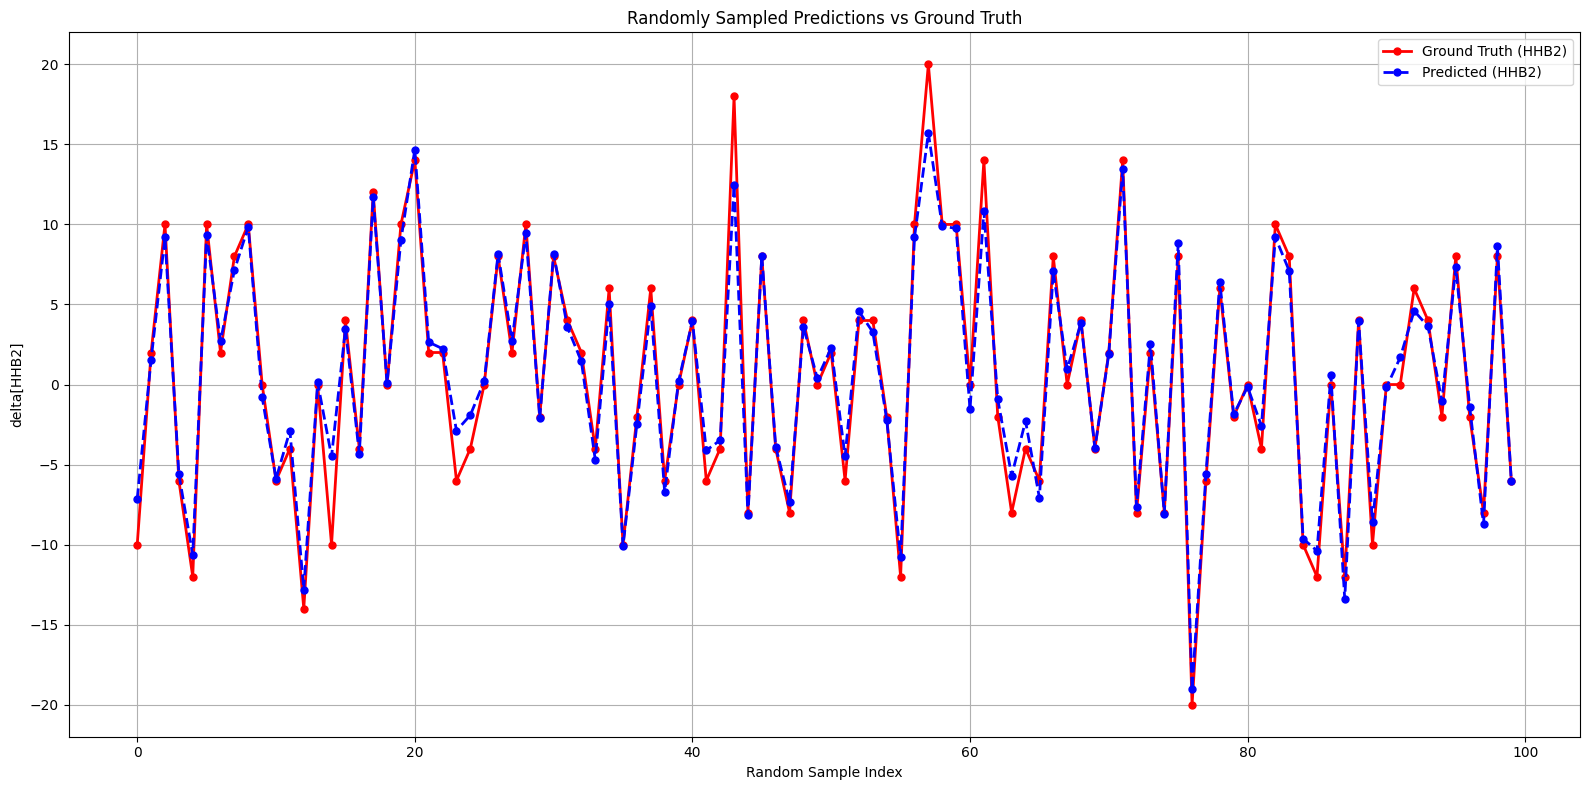

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Randomly select 100 indices
indices = np.random.choice(len(y_test), size=100, replace=False)
indices = np.sort(indices)

# Extract corresponding values
y_test_sampled = y_test[indices]
y_pred_sampled = y_preds[indices]
# Plot with circular markers
plt.figure(figsize=(16, 8))
plt.plot(y_test_sampled, 'r-o', label='Ground Truth (HHB2)', linewidth=2, markersize=5)
plt.plot(y_pred_sampled, 'b--o', label='Predicted (HHB2)', linewidth=2, markersize=5)
plt.xlabel('Random Sample Index')
plt.ylabel('delta[HHB2]')
plt.title('Randomly Sampled Predictions vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

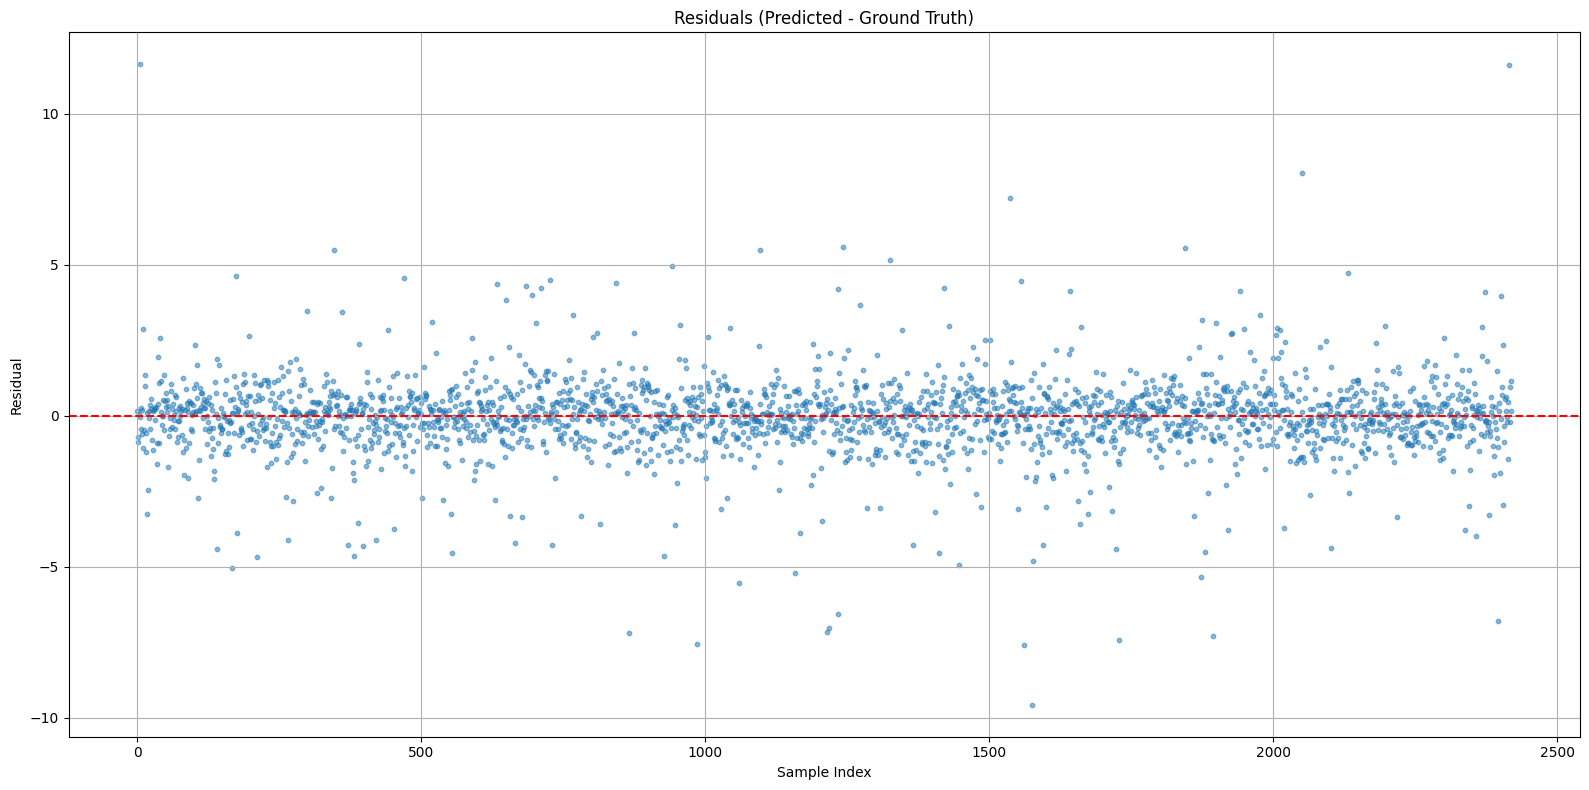

In [38]:
residuals = y_preds - y_test

plt.figure(figsize=(16, 8))
plt.scatter(range(len(residuals)), residuals, s=10, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Predicted - Ground Truth)")
plt.ylabel("Residual")
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

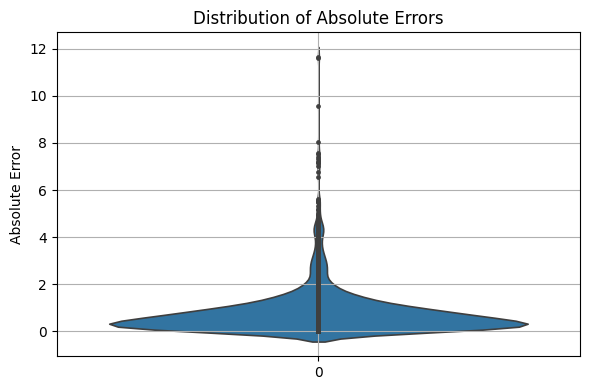

In [39]:

# Assume these are your predictions and ground truth
errors = np.abs(y_preds - y_test)  # absolute error

# Create violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=errors, inner="point", linewidth=1.2)
plt.ylabel("Absolute Error")
plt.title("Distribution of Absolute Errors")
plt.grid(True)
plt.tight_layout()
plt.show()


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=2000,      # Number of trees
    max_depth=16,           # Maximum depth of each tree
    random_state=42,
    n_jobs=-1               # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

(9680, 64) (2420, 64) (9680, 1) (2420, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test MSE: 8.6279


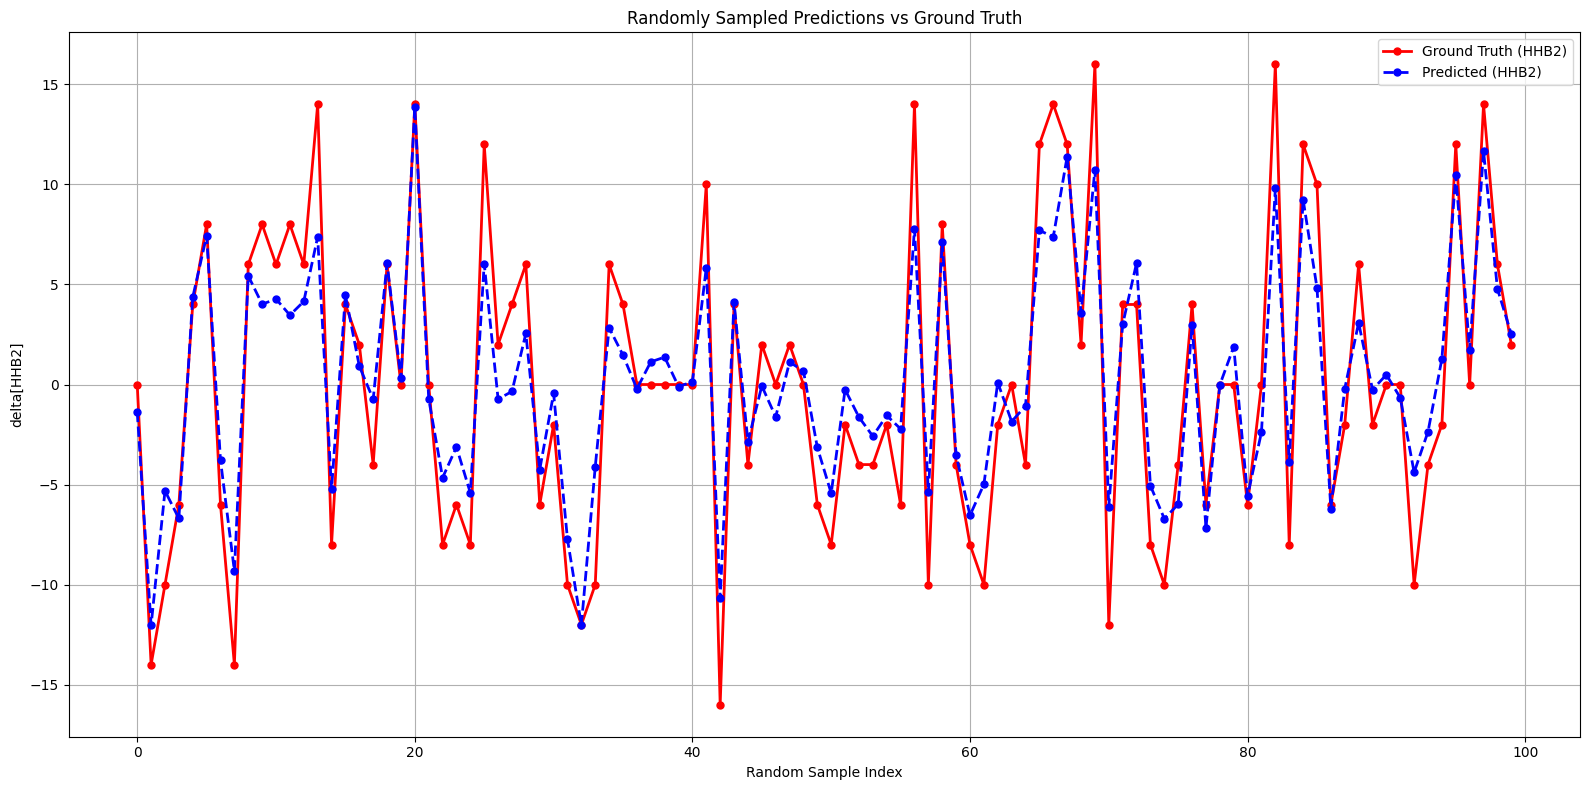

In [40]:
# Randomly select 100 indices
indices = np.random.choice(len(y_test), size=100, replace=False)
indices = np.sort(indices)

# Extract corresponding values
y_test_sampled = y_test[indices]
y_pred_sampled = y_pred[indices]
# Plot with circular markers
plt.figure(figsize=(16, 8))
plt.plot(y_test_sampled, 'r-o', label='Ground Truth (HHB2)', linewidth=2, markersize=5)
plt.plot(y_pred_sampled, 'b--o', label='Predicted (HHB2)', linewidth=2, markersize=5)
plt.xlabel('Random Sample Index')
plt.ylabel('delta[HHB2]')
plt.title('Randomly Sampled Predictions vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

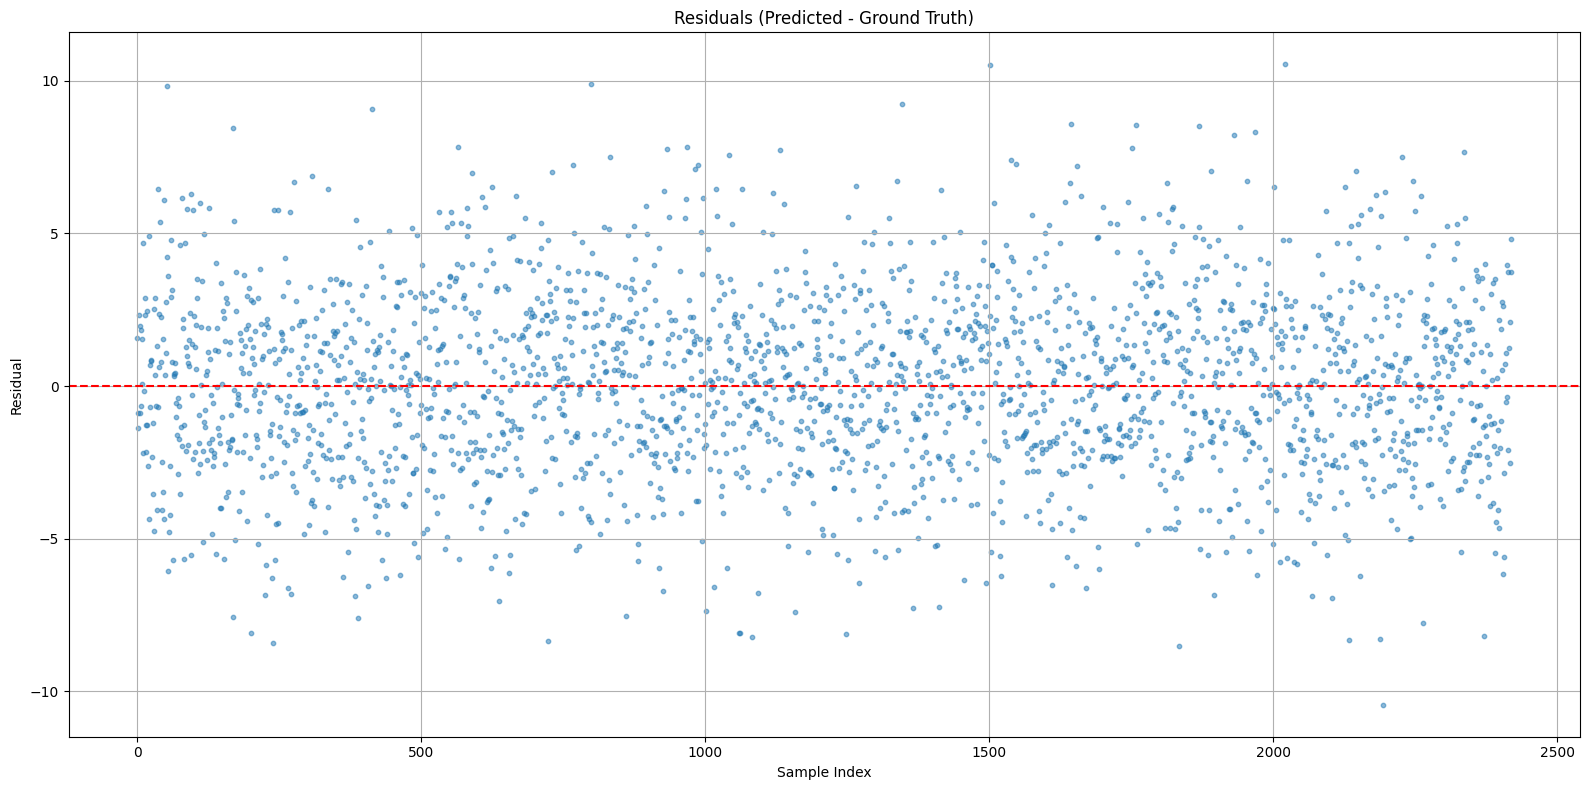

In [43]:
y_pred = y_pred.reshape(-1, 1)
residuals = y_pred - y_test
# Ensure both are 1D arrays

plt.figure(figsize=(16, 8))
plt.scatter(range(len(residuals)), residuals, s=10, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Predicted - Ground Truth)")
plt.ylabel("Residual")
plt.ylim(-10, 10)
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

### ANN

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler


# Fit scaler on training targets only
scaler_y = StandardScaler()
y_train_s = scaler_y.fit_transform(y_train)
y_test_s = scaler_y.transform(y_test)

scaler_X = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s = scaler_X.transform(X_test)

# Define ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train_s, y_train_s, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, y_pred)
print(f"Test MSE: {mse:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.9938 - val_loss: 0.9646
Epoch 2/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9506 - val_loss: 0.9581
Epoch 3/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9350 - val_loss: 0.9201
Epoch 4/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9097 - val_loss: 0.8673
Epoch 5/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8740 - val_loss: 0.8273
Epoch 6/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8118 - val_loss: 0.7207
Epoch 7/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7045 - val_loss: 0.5729
Epoch 8/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5642 - val_loss: 0.4487
Epoch 9/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4144 - val_loss: 0.3254
Epoch 10/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3297 - val_loss: 0.3102
Epoch 11/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2760 - val_loss: 0.2523
Epoch 12/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

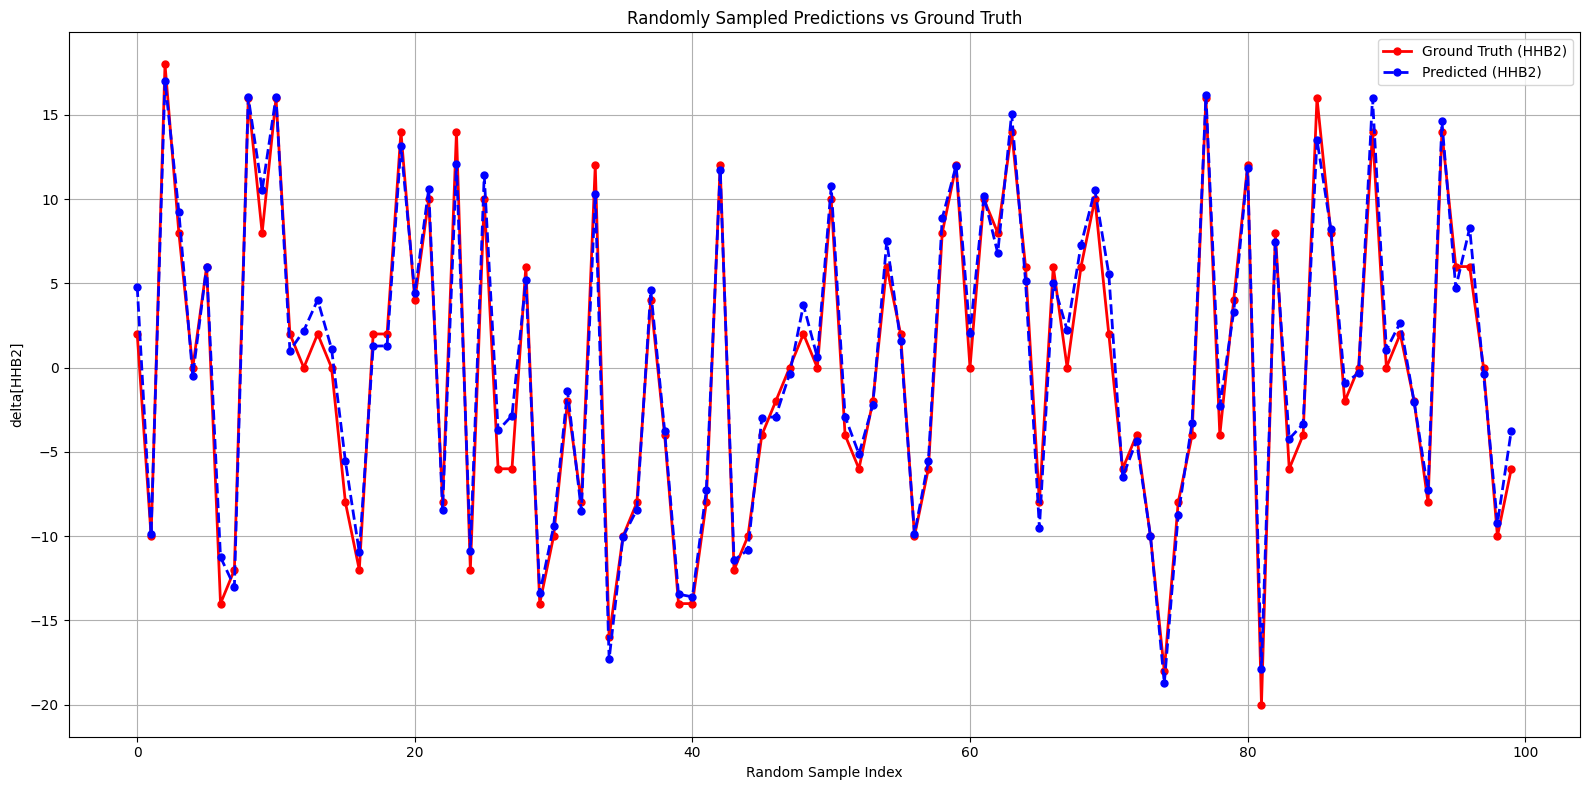

In [76]:
#y_pred = model.predict(X_test_s)

# Randomly select 100 indices
indices = np.random.choice(len(y_test_s), size=100, replace=False)
indices = np.sort(indices)

y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test_s.reshape(-1, 1)).flatten()

# Extract corresponding values
y_test_sampled = y_test_rescaled[indices]
y_pred_sampled = y_pred_rescaled[indices]

# Plot with circular markers
plt.figure(figsize=(16, 8))
plt.plot(y_test_sampled, 'r-o', label='Ground Truth (HHB2)', linewidth=2, markersize=5)
plt.plot(y_pred_sampled, 'b--o', label='Predicted (HHB2)', linewidth=2, markersize=5)
plt.xlabel('Random Sample Index')
plt.ylabel('delta[HHB2]')
plt.title('Randomly Sampled Predictions vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Test MSE (original scale): 1.6045


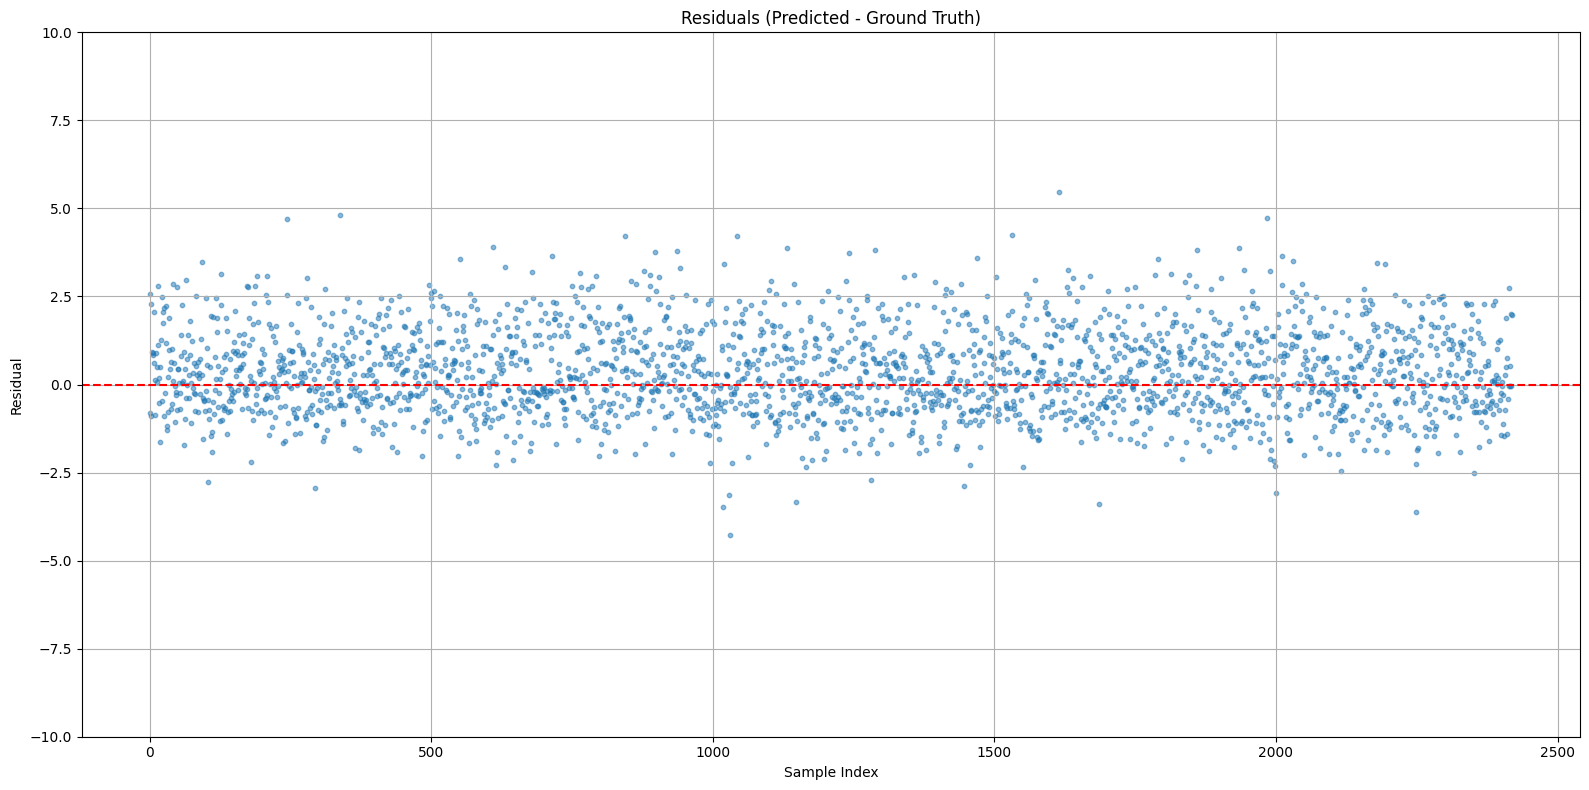

In [84]:
# Inverse-transform predictions and ground truth
y_pred_orig = scaler_y.inverse_transform(y_pred)       # shape (n, 1)
y_test_orig = scaler_y.inverse_transform(y_test_s)     # shape (n, 1)

# Compute residuals in original scale
residuals = y_pred_orig - y_test_orig

mse_rescaled = mean_squared_error(y_test_orig, y_pred_orig)
print(f"Test MSE (original scale): {mse_rescaled:.4f}")

# Plot residuals
plt.figure(figsize=(16, 8))
plt.scatter(range(len(residuals)), residuals, s=10, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Predicted - Ground Truth)")
plt.ylabel("Residual")
plt.ylim(-10, 10)
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

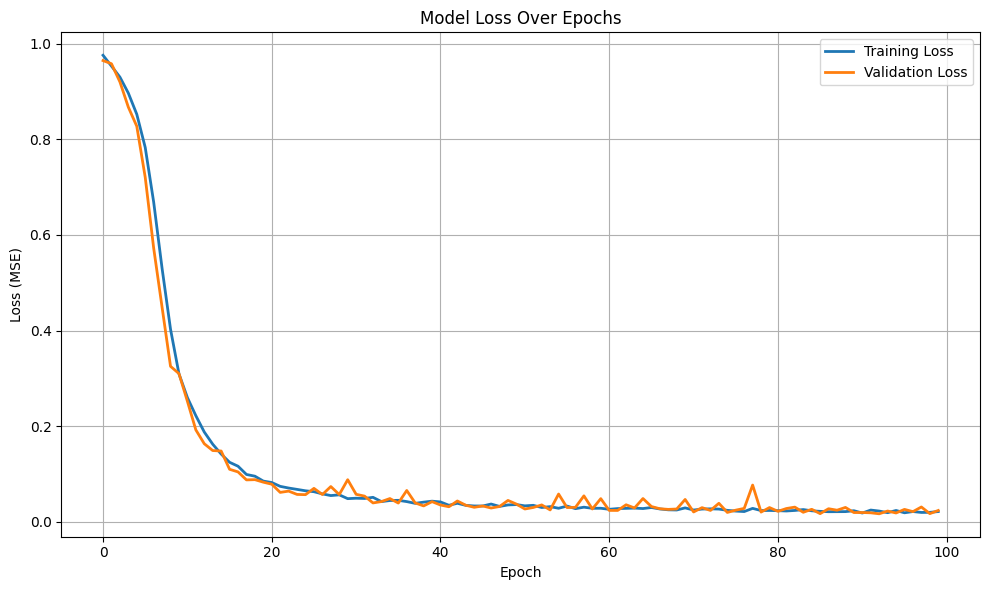

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
